# Reprezentacja grafowa obrazu #
Plan:

1. Wczytywanie obrazu.

2. Transformacja do grafu.

3. Wizualizacja za pomocą programu *graphviz*.

## Import bibliotek##

In [1]:
from PIL import Image
import numpy as np
import networkx as nx
from graphviz import Graph
from networkx.algorithms import approximation as apxa
from random import randint

## 1. Wczytywanie obrazu ##

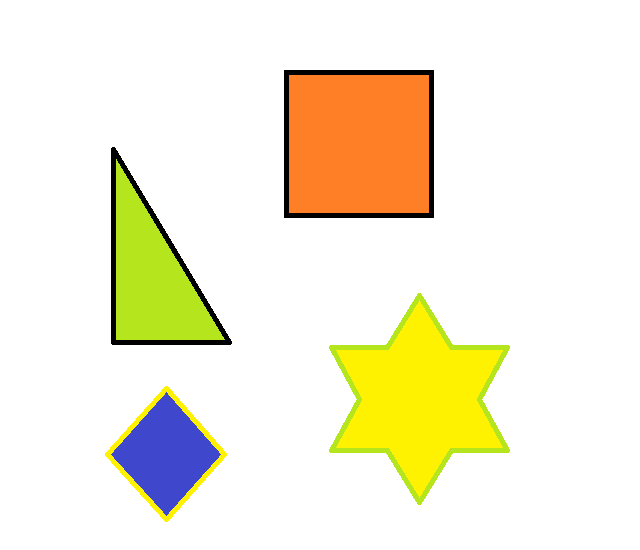

In [2]:
hen = Image.open("./my_img.png")
hen

Teraz należy przekształcić obraz do postaci macierzy $64 \times 64 \times 3$. Jej elementami będą wartości poszczególnych pikseli. Zauważmy, że jest to macierz 3-wymiarowa - ostatni wymiar odpowiada warstwom *RGB*. Proponuję zatem rozważyć trzy macierze reprezentujące odpowiednie warstwy.

In [3]:
hen = hen.resize((128,128))
image_arr = np.array(hen, dtype='int16')
image_arr.shape

(128, 128, 3)

In [4]:
r_channel = image_arr[:,:,0] 
g_channel = image_arr[:,:,1]
b_channel = image_arr[:,:,2]

In [5]:
r_channel.shape

(128, 128)

TODO - wyświetlić jak wyglądają obrazy tych warstwy...

## 2. Transformacja do grafu ##

Następnie przystępujemy do budowy grafów $G_r, G_g, G_b$ reprezentujących warstwy obrazu.

**Opis konstrukcji**: wierzchołki to piksele, krawędź łącząca sąsiednie piksele $p_1, p_2$ ma wagę $d(p_1, p_2) = abs(w(p_1) - w(p_2))$, istnieje jeśli $d \leq p$, gdzie $p$ to wyznaczona przez autora *granica*.

In [6]:
# User może zdefiniować jaka jest granica
p = 25

In [7]:
graph_r = nx.Graph()
graph_g = nx.Graph()
graph_b = nx.Graph()

Definiowanie zbiorów wierzchołków grafów $G_r, G_g, G_b$

In [8]:
for i in range(image_arr.shape[0]):
    for j in range(image_arr.shape[1]):
        graph_r.add_node((i, j)) # wierzchołki to pary (i,j)
        graph_g.add_node((i, j))
        graph_b.add_node((i, j))

Definiowanie zbiorów krawędzi grafów $G_r, G_g, G_b$ przy uwzględnieniu granicy $p$.

In [9]:
for i in range(image_arr.shape[0]):
    for j in range(image_arr.shape[1]):
        # badamy wcześniejszych sąsiadów piksela (i,j)
        if i - 1 >= 0 and abs(r_channel[i][j] - r_channel[i-1][j]) <= p:
            graph_r.add_edge((i, j), (i-1, j), weight=abs(r_channel[i][j] - r_channel[i-1][j]))
            
        if j - 1 >= 0 and abs(r_channel[i][j] - r_channel[i][j-1]) <= p:
            graph_r.add_edge((i, j), (i, j-1), weight=abs(r_channel[i][j] - r_channel[i][j-1]))
            
#         if i - 1 >= 0 and j - 1 >= 0 and abs(r_channel[i][j] - r_channel[i-1][j-1]) <= p:
#             graph_r.add_edge((i, j), (i-1, j-1), weight=abs(r_channel[i][j] - r_channel[i-1][j-1]))
        
#         if i - 1 >= 0 and j + 1 < image_arr.shape[1] and abs(r_channel[i][j] - r_channel[i-1][j+1]) <= p:
#             graph_r.add_edge((i, j), (i-1, j+1), weight=abs(r_channel[i][j] - r_channel[i-1][j+1]))

In [10]:
for i in range(image_arr.shape[0]):
    for j in range(image_arr.shape[1]):
        if i - 1 >= 0 and abs(g_channel[i][j] - g_channel[i-1][j]) <= p:
            graph_g.add_edge((i, j), (i-1, j), weight=abs(g_channel[i][j] - g_channel[i-1][j]))
            
        if j - 1 >= 0 and abs(g_channel[i][j] - g_channel[i][j-1]) <= p:
            graph_g.add_edge((i, j), (i, j-1), weight=abs(g_channel[i][j] - g_channel[i][j-1]))
            
#         if i - 1 >= 0 and j - 1 >= 0 and abs(g_channel[i][j] - g_channel[i-1][j-1]) <= p:
#             graph_g.add_edge((i, j), (i-1, j-1), weight=abs(g_channel[i][j] - g_channel[i-1][j-1]))
        
#         if i - 1 >= 0 and j + 1 < image_arr.shape[1] and abs(g_channel[i][j] - g_channel[i-1][j+1]) <= p:
#             graph_g.add_edge((i, j), (i-1, j+1), weight=abs(g_channel[i][j] - g_channel[i-1][j+1]))

In [11]:
for i in range(image_arr.shape[0]):
    for j in range(image_arr.shape[1]):
        if i - 1 >= 0 and abs(b_channel[i][j] - b_channel[i-1][j]) <= p:
            graph_b.add_edge((i, j), (i-1, j), weight=abs(b_channel[i][j] - b_channel[i-1][j]))
            
        if j - 1 >= 0 and abs(b_channel[i][j] - b_channel[i][j-1]) <= p:
            graph_b.add_edge((i, j), (i, j-1), weight=abs(b_channel[i][j] - b_channel[i][j-1]))
            
#         if i - 1 >= 0 and j - 1 >= 0 and abs(b_channel[i][j] - b_channel[i-1][j-1]) <= p:
#             graph_b.add_edge((i, j), (i-1, j-1), weight=abs(b_channel[i][j] - b_channel[i-1][j-1]))
        
#         if i - 1 >= 0 and j + 1 < image_arr.shape[1] and abs(b_channel[i][j] - b_channel[i-1][j+1]) <= p:
#             graph_b.add_edge((i, j), (i-1, j+1), weight=abs(b_channel[i][j] - b_channel[i-1][j+1]))

zrobić jedną funkcję...

## 3. Wizualizacja grafu za pomocą narzędzia *graphviz* ##

In [12]:
graph1 = Graph(format='png')

In [13]:
for g in graph_r:
    name = str(g[0]) + "-" + str(g[1])
    graph1.node(name)

In [14]:
# na przyszłość...
# print(graph_b.get_edge_data((1,1),(1,0)))

In [15]:
for e in graph_r.edges:
    tail_name = str(e[0][0]) + "-" + str(e[0][1])
    head_name = str(e[1][0]) + "-" + str(e[1][1])
    graph1.edge(tail_name=tail_name, head_name=head_name)

In [16]:
# graph1.render(filename='graph1')

Poniższy kod pozwala na wygenerowanie grafu o wierzchołkach ułożonych zgodnie z układem pikseli w wyjściowym obrazku.

In [17]:
graph2 = Graph(engine="neato", filename='graph2.gv',format='png')

In [18]:
graph2.attr(size='64')
for g in graph_g:
    name = str(g[0]) + "-" + str(g[1])
    pos = str(g[0]) + ',' + str(g[1]) + '!'
    graph2.node(name, pos=pos)

In [19]:
for e in graph_g.edges:
    tail_name = str(e[0][0]) + "-" + str(e[0][1])
    head_name = str(e[1][0]) + "-" + str(e[1][1])
    graph2.edge(tail_name=tail_name, head_name=head_name)

In [20]:
# graph2.render(filename='graph2')

## 4. Wyznaczenie składowych k-spójnych

In [35]:
# funkcja k_components() zwraca listę zbiorów zawierających spójne składowe kolejnych stopni,
# tzn. k_components[2] zawiera zbiór składowych 2-spójnych
k_components = apxa.k_components(graph_r)

In [22]:
# ten graf nie jest 3-spójny...
k_components[3]

[]

In [23]:
two_connected_components = k_components[2]

In [24]:
len(two_connected_components)

10

In [31]:
colors = ['palegreen3', 'paleturquoise3', 'palevioletred3','azure', 'pink1', 
          'plum1', 'purple', 'purple4', 'salmon', 'coral',
          'seagreen', 'violet', 'deeppink', 'crimson', 'grey', 
          'darkred', 'tomato', 'teal', 'indigo', 'magenta']

# TODO - zamiast losowania kolorów wprowadzić dobieranie koloru odpowiadającego danemu obszarowi w oryginalnym obrazie

In [29]:
two_connected_subgraph = Graph(engine="neato", filename='two_conn.gv',format='png')

two_connected_subgraph.attr(size='64')
i = 0

# rysuję graf złożony z podgrafów 2-spójnych
for component in two_connected_components:
    for pair in component:
        name = str(pair[0]) + "-" + str(pair[1])
        pos = str(pair[1]) + ',' + str(64-pair[0]) + '!' # żeby uzyskać poprawne rozmieszczenie na obrazie
        color = colors[i]
        two_connected_subgraph.node(name, pos=pos, color=color, style='filled', fillcolor=color)
    i = randint(0,len(colors)-1)

In [32]:
two_connected_subgraph.render(filename='my_img_segmented')

'my_img_segmented.png'

## Rezultaty ##

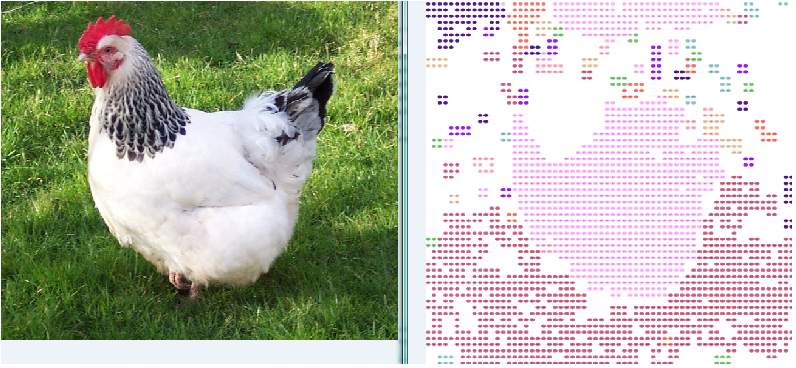

In [33]:
Image.open("./comp1.png")

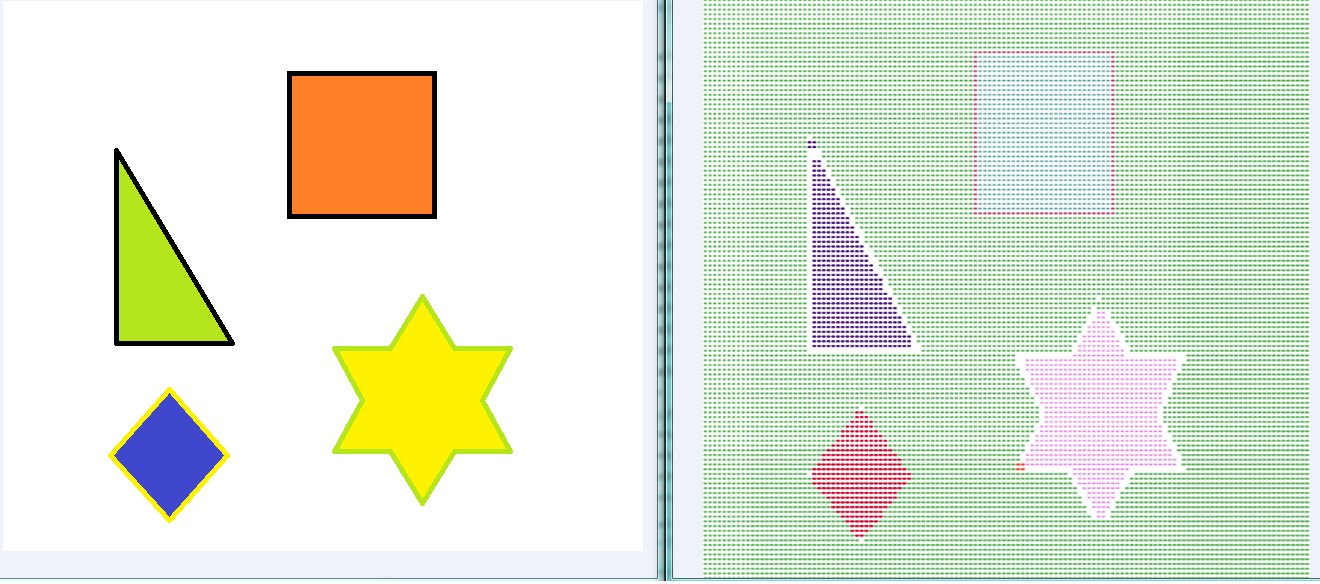

In [34]:
Image.open("./comp2.png")

## Wnioski ##
- parametry wpływające na ostateczny efekt segmentacji: wartość progowa $p$, rozdzielczość obrazka, liczba krawędzi w badanych grafie (grafy o max stopniu mniejszym lub równym 4 są analizowane całkiem szybko, jednak gdy max stopień wynosi 8, to czas obliczeń znacząco wzrasta)

- 